# **Segmentações**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [48]:
from sklearn import tree

In [ ]:
!pip install plotly
!pip install CHAID

In [24]:
!pip install -U kaleido

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (30, 4),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

In [3]:
df = pd.read_csv(filepath_or_buffer='ml_project1_data_NOVO.csv', index_col=0)

keys = ['ID']
target = ['Response']

## Análise RFM

In [4]:
# Recency
features_recency = ['Recency']

# Monetary
features_monetary = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'MntTotal']

# Frequency
features_frequency = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumPurchases', 'NumWebVisitsMonth']

## Recência

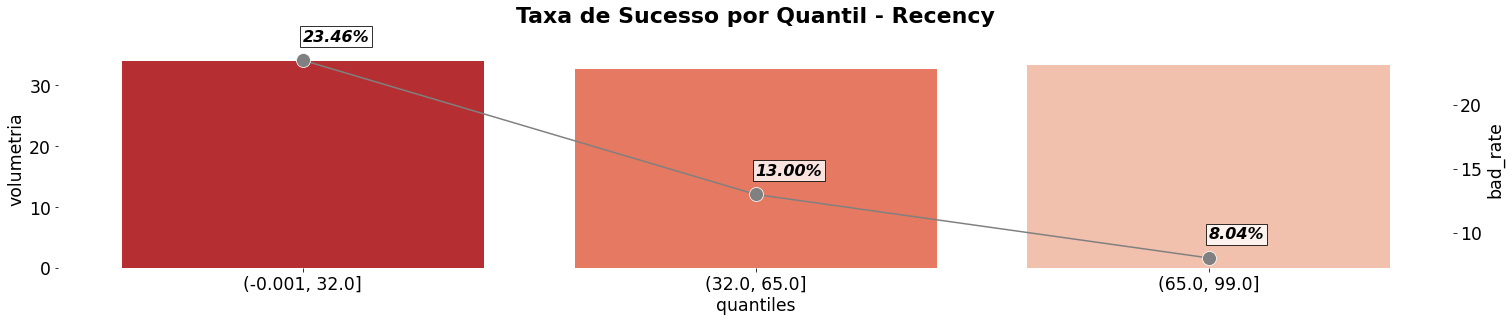

In [70]:
df['Recency_quantiles'] = pd.qcut(df['Recency'], q=3)

df_bad_rate_quantiles = pd.DataFrame(columns=['volumetria', 'bad_rate'])

df_bad_rate_quantiles['volumetria'] = 100*df['Recency_quantiles'].value_counts(normalize=True)
df_bad_rate_quantiles['bad_rate'] = 100*df.groupby(by='Recency_quantiles')['Response'].mean()

df_bad_rate_quantiles.sort_index(inplace=True)

df_bad_rate_quantiles.reset_index(level=0, inplace=True)
df_bad_rate_quantiles.rename(columns={'index': 'quantiles'}, inplace=True)
df_bad_rate_quantiles['quantiles'] = df_bad_rate_quantiles['quantiles'].astype('str')

#graficos 
plt.figure(figsize=(25,4))

sns.barplot(data=df_bad_rate_quantiles, x='quantiles', y='volumetria', palette = 'Reds_r', )
ax2 = plt.twinx()
sns.lineplot(data=df_bad_rate_quantiles, x='quantiles', y='bad_rate', ax=ax2, marker='o', color='gray', markersize=14)

plt.title('Taxa de Sucesso por Quantil - Recency', fontsize=22, weight='bold', y=1.1)

x = df_bad_rate_quantiles.index
n = df_bad_rate_quantiles['bad_rate']

for i, v in enumerate(n):
    plt.text(x[i], n[i]+1.5, "%.2f%%"%(v), fontsize=16, weight='bold', style='italic', bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 3})

sns.despine(bottom = True, left = True)
plt.show()

In [8]:
df[df['NumPurchases']==0][['NumPurchases', 'MntTotal']]

NumPurchases  MntTotal
655              0         5
981              0         5
1245             0         7
1524             0         4
1846             0         8
2132             0         7

## Frequência

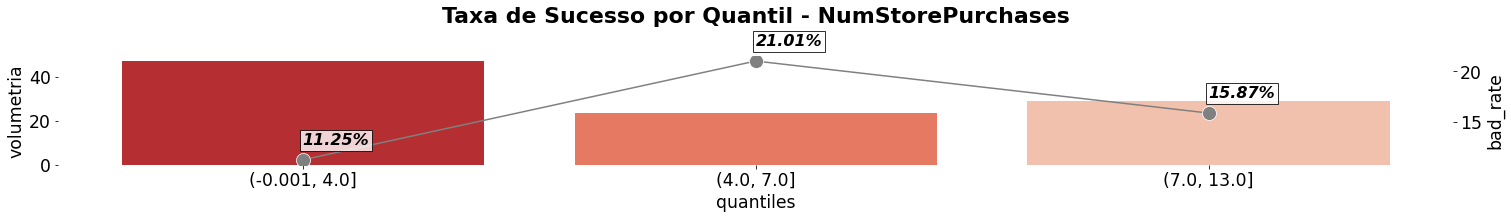

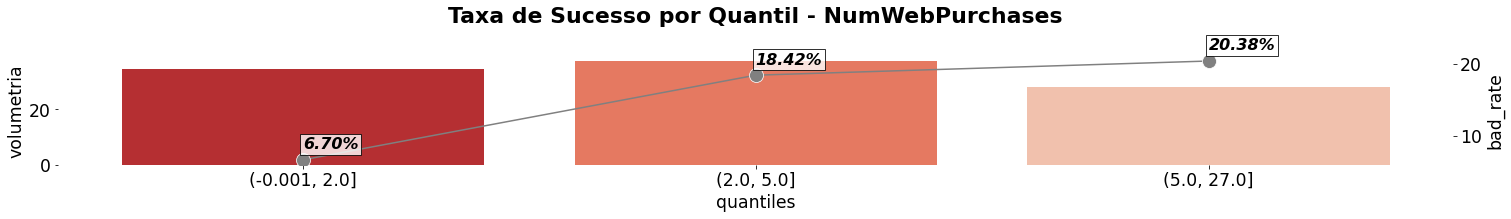

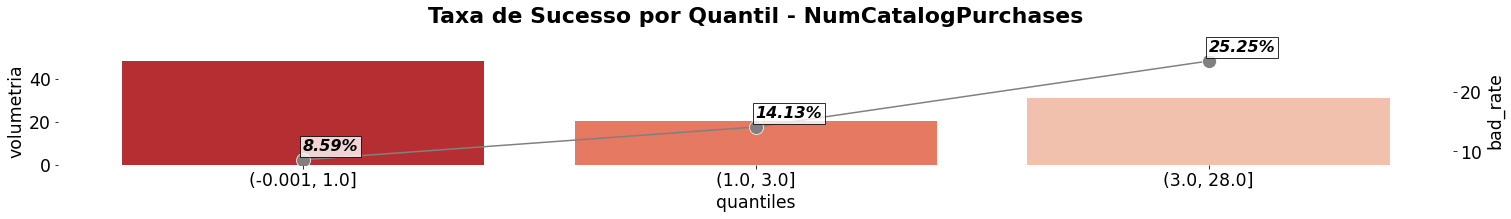

In [71]:
for col in ['NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases']:

    df[col+'_quantiles'] = pd.qcut(df[col], q=3)

    df_bad_rate_quantiles = pd.DataFrame(columns=['volumetria', 'bad_rate'])

    df_bad_rate_quantiles['volumetria'] = 100*df[col+'_quantiles'].value_counts(normalize=True)
    df_bad_rate_quantiles['bad_rate'] = 100*df.groupby(by=col+'_quantiles')['Response'].mean()

    df_bad_rate_quantiles.sort_index(inplace=True)

    df_bad_rate_quantiles.reset_index(level=0, inplace=True)
    df_bad_rate_quantiles.rename(columns={'index': 'quantiles'}, inplace=True)
    df_bad_rate_quantiles['quantiles'] = df_bad_rate_quantiles['quantiles'].astype('str')

    #graficos 
    plt.figure(figsize=(25, 2))

    sns.barplot(data=df_bad_rate_quantiles, x='quantiles', y='volumetria', palette = 'Reds_r')
    ax2 = plt.twinx()
    sns.lineplot(data=df_bad_rate_quantiles, x='quantiles', y='bad_rate', ax=ax2, marker='o', color='gray', markersize=14)

    plt.title('Taxa de Sucesso por Quantil - %s'%(col), fontsize=22, weight='bold', y=1.25)

    x = df_bad_rate_quantiles.index
    n = df_bad_rate_quantiles['bad_rate']

    for i, v in enumerate(n):
        plt.text(x[i], n[i]+1.5, "%.2f%%"%(v), fontsize=16, weight='bold', style='italic', bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 3})

    sns.despine(bottom = True, left = True)
    plt.show()

## Monetário

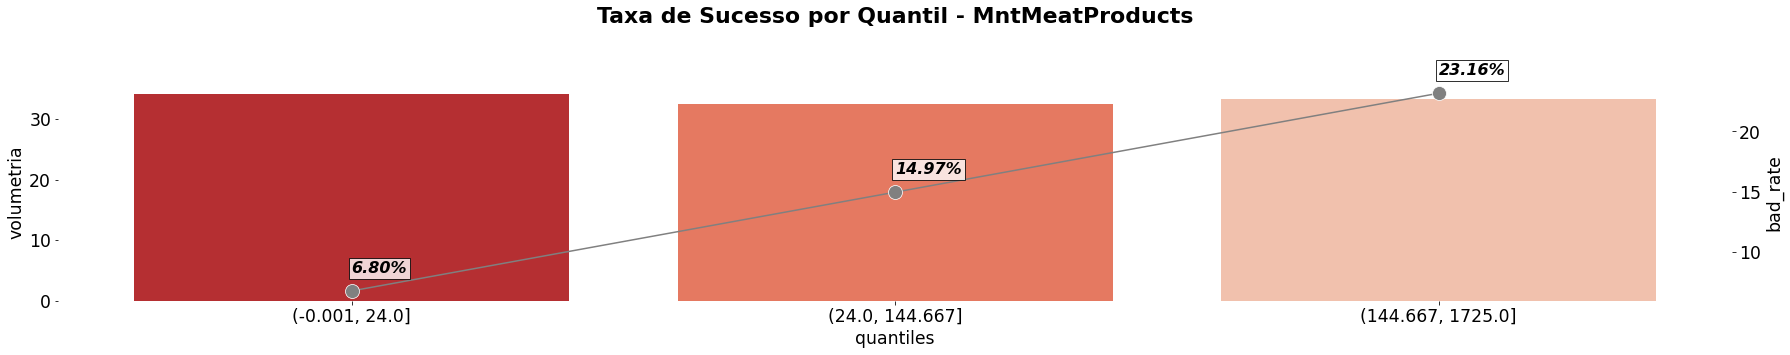

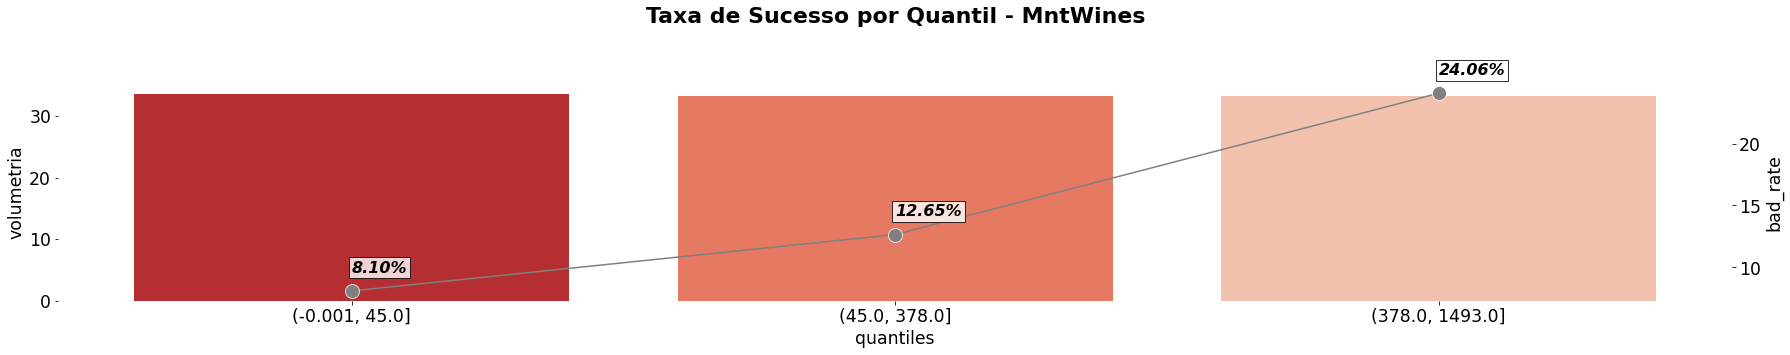

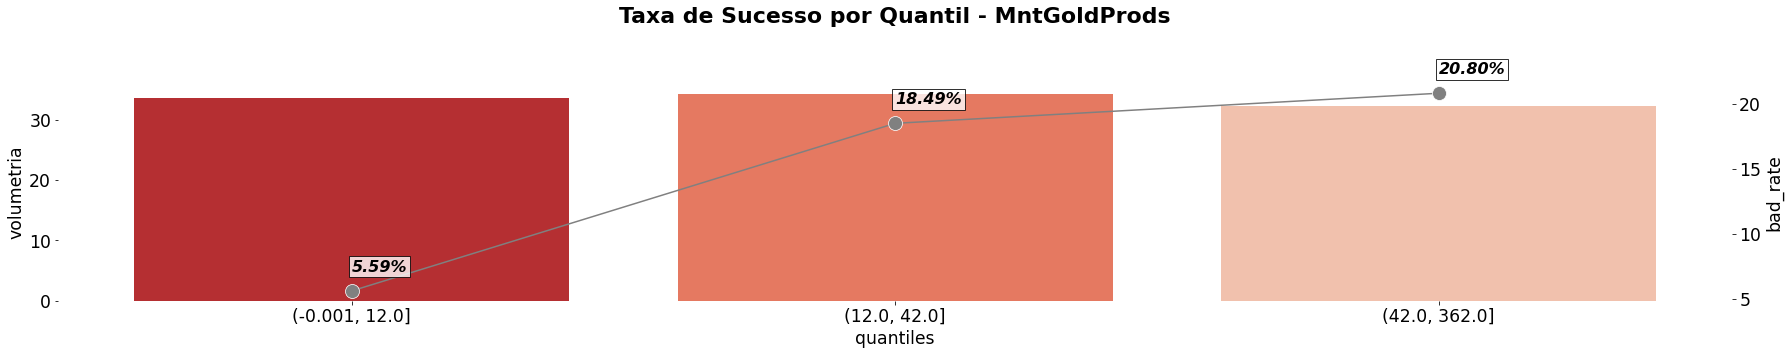

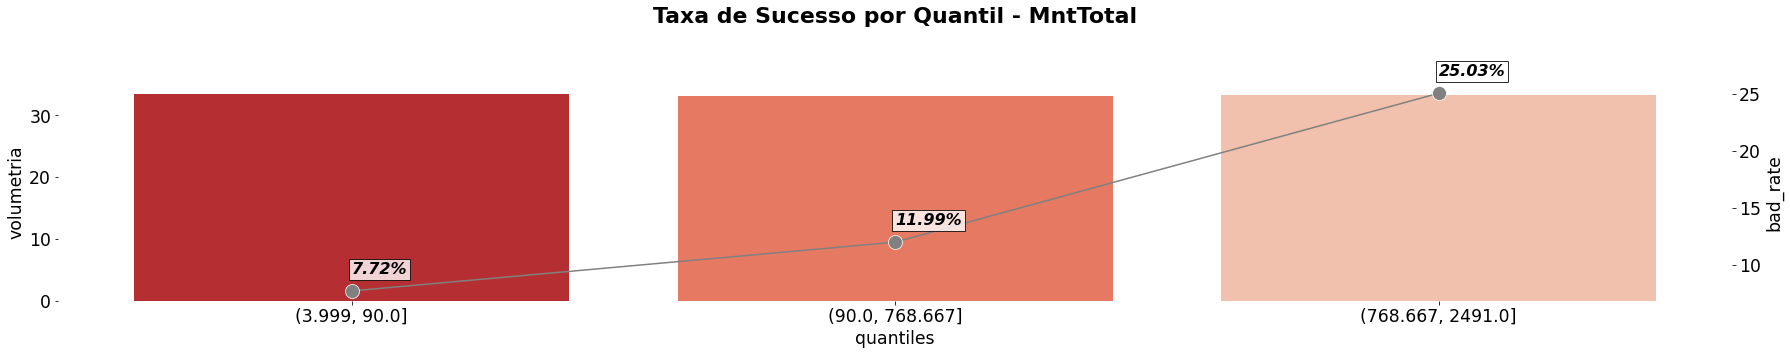

In [72]:
for col in ['MntMeatProducts', 'MntWines', 'MntGoldProds', 'MntTotal']:
    df[col+'_quantiles'] = pd.qcut(df[col], q=3)

    df_bad_rate_quantiles = pd.DataFrame(columns=['volumetria', 'bad_rate'])

    df_bad_rate_quantiles['volumetria'] = 100*df[col+'_quantiles'].value_counts(normalize=True)
    df_bad_rate_quantiles['bad_rate'] = 100*df.groupby(by=col+'_quantiles')['Response'].mean()

    df_bad_rate_quantiles.sort_index(inplace=True)

    df_bad_rate_quantiles.reset_index(level=0, inplace=True)
    df_bad_rate_quantiles.rename(columns={'index': 'quantiles'}, inplace=True)
    df_bad_rate_quantiles['quantiles'] = df_bad_rate_quantiles['quantiles'].astype('str')

    #graficos 
    plt.figure(figsize=(30, 4))

    sns.barplot(data=df_bad_rate_quantiles, x='quantiles', y='volumetria', palette = 'Reds_r')
    ax2 = plt.twinx()
    sns.lineplot(data=df_bad_rate_quantiles, x='quantiles', y='bad_rate', ax=ax2, marker='o', color='gray', markersize=14)

    plt.title('Taxa de Sucesso por Quantil - %s'%(col), fontsize=22, weight='bold', y=1.25)

    x = df_bad_rate_quantiles.index
    n = df_bad_rate_quantiles['bad_rate']

    for i, v in enumerate(n):
        plt.text(x[i], n[i]+1.5, "%.2f%%"%(v), fontsize=16, weight='bold', style='italic', bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 3})

    sns.despine(bottom = True, left = True)
    plt.show()

## Segmentação

In [11]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [12]:
features_segmentacao = ['Recency', 'NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'MntMeatProducts', 'MntWines', 'MntGoldProds', 'MntTotal']

In [42]:
df['Recency_quantiles'] = df['Recency_quantiles'].astype('str')
df_train, df_test = train_test_split(df, test_size=0.25, stratify=df[target], random_state=42)

In [187]:
modelo_arv = RandomizedSearchCV(
            DecisionTreeClassifier(random_state=42),
            {
                'criterion': ['gini', 'entropy'], 
                'splitter': ['best', 'random'],
                'max_features' : ['sqrt','auto', 1.0],
                #'min_impurity_decrease' : [0.000015, 0.000030, 0.000050, 0.000075, 0.000090, 0.0001],
                'min_samples_split': [300, 325, 350, 375, 400, 450, 500, 550, 600, 650, 750, 800, 900, 1000, 1200], 
                'min_samples_leaf': [0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015],
                'max_depth': [6,7,8,9,10],
                'class_weight': [None, 'balanced'],
                'max_leaf_nodes' : [4, 5, 6, 7, 8, 9, 10]
            },
            scoring='roc_auc',
            n_jobs=-1,
            n_iter = 500,
            verbose=0
        )

X_train = df_train[features_segmentacao]
y_train = df_train[target]

modelo_arv.fit(X_train, y_train)

arv_final = modelo_arv.best_estimator_

arv_final.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=9,
                       max_features='auto', max_leaf_nodes=10,
                       min_samples_leaf=0.013, min_samples_split=300,
                       random_state=42)

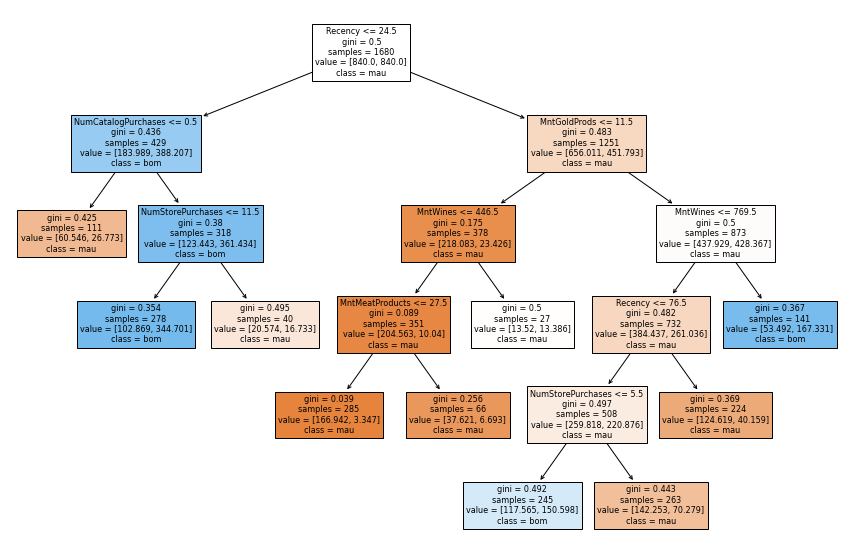

In [188]:
plt.figure(figsize=(15, 10))

_ = tree.plot_tree(arv_final, 
                   feature_names=features_segmentacao,  
                   class_names=['mau', 'bom'],
                   filled=True)

In [190]:
arv_final.predict_proba(df_test[features_segmentacao])

array([[0.69338876, 0.30661124],
       [0.22983905, 0.77016095],
       [0.50248063, 0.49751937],
       ...,
       [0.4384088 , 0.5615912 ],
       [0.75628198, 0.24371802],
       [0.69338876, 0.30661124]])

In [57]:
df_rec_curta = df_train[df_train['Recency_quantiles']=='(-0.001, 32.0]'].copy()
df_rec_media = df_train[df_train['Recency_quantiles']=='(32.0, 65.0]'].copy()
df_rec_longa = df_train[df_train['Recency_quantiles']=='(65.0, 99.0]'].copy()

In [58]:
len(df_rec_media), len(df_rec_longa)

(553, 557)

## Recência Curta

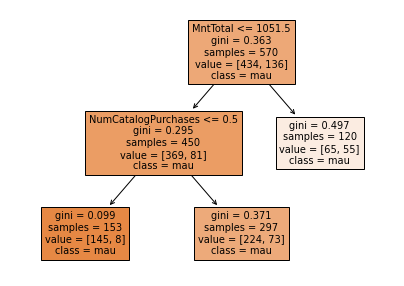

In [60]:
X_train_curta = df_rec_curta[features_segmentacao]
y_train_curta = df_rec_curta[target]

modelo_arv_rec_curta = DecisionTreeClassifier(max_leaf_nodes=3, max_depth=3, random_state=42)

modelo_arv_rec_curta.fit(X_train_curta, y_train_curta)

plt.figure(figsize=(7, 5))

_ = tree.plot_tree(modelo_arv_rec_curta, 
                   feature_names=features_segmentacao,  
                   class_names=['mau', 'bom'],
                   filled=True)

## Recência Curta

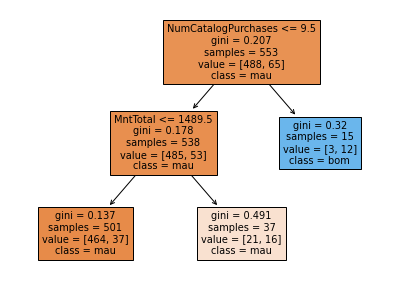

In [61]:
X_train_media = df_rec_media[features_segmentacao]
y_train_media = df_rec_media[target]

modelo_arv_rec_media = DecisionTreeClassifier(max_leaf_nodes=3, max_depth=3, random_state=42)

modelo_arv_rec_media.fit(X_train_media, y_train_media)

plt.figure(figsize=(7, 5))

_ = tree.plot_tree(modelo_arv_rec_media, 
                   feature_names=features_segmentacao,  
                   class_names=['mau', 'bom'],
                   filled=True)

## Recência Longa

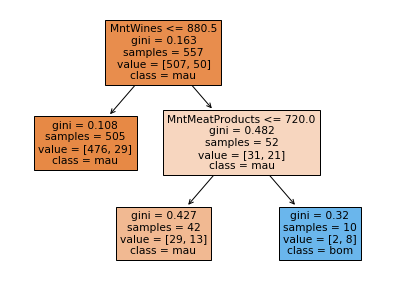

In [63]:
X_train_longa = df_rec_longa[features_segmentacao]
y_train_longa = df_rec_longa[target]

modelo_arv_rec_longa = DecisionTreeClassifier(max_leaf_nodes=3, max_depth=3, random_state=42)

modelo_arv_rec_longa.fit(X_train_longa, y_train_longa)

plt.figure(figsize=(7, 5))

_ = tree.plot_tree(modelo_arv_rec_longa, 
                   feature_names=features_segmentacao,  
                   class_names=['mau', 'bom'],
                   filled=True)

In [15]:
## Árvore com CHAID

from CHAID import Tree

tipos = [ 'ordinal' for i in range(0, len(features_segmentacao)) ]

arv_chaid = Tree.from_pandas_df(df[features_segmentacao+target], dict(zip(features_segmentacao, tipos)), target, max_depth=3, min_child_node_size=500, min_parent_node_size=100, split_threshold=1000)